In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [2]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

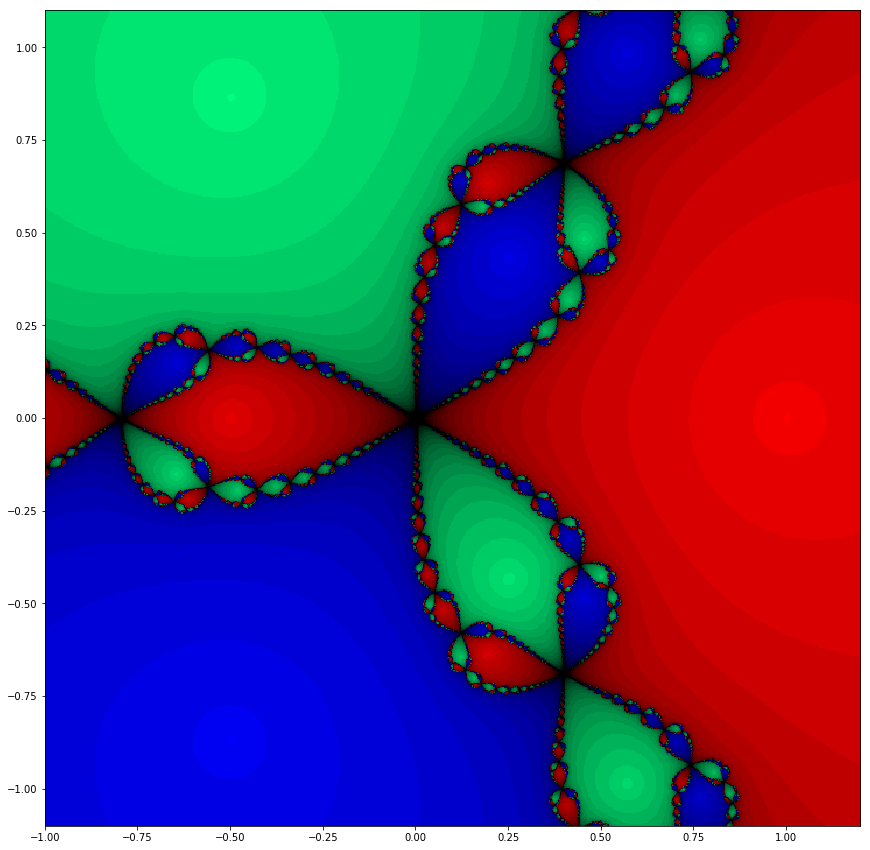

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


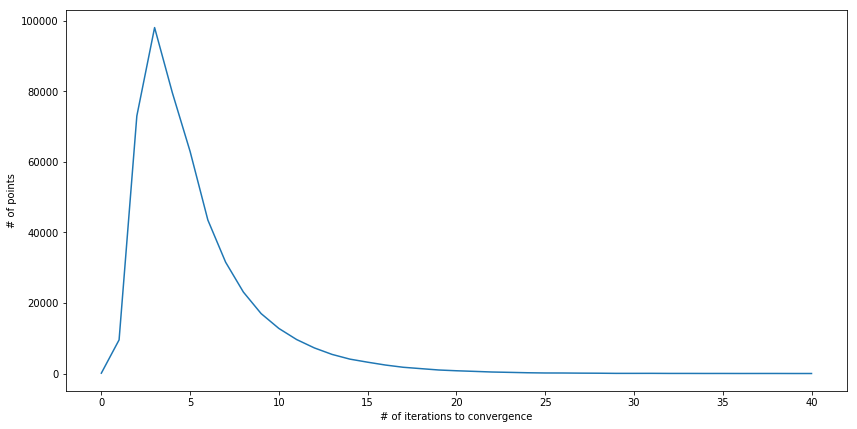

In [3]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                # modified 
                img[i,j]=[max(0, (sit-k)*f*c) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

*The code wasn't running on my system because of a PyPlot error. The colors in the image had negative values if `k` was greater than `sit`, which apparently is not allowed in the version of the library I have. I changed it to `max(0, ...)`. *

**Question 1.** There is a large monochromatic region around each of the root because the values in this area are already close to the root, so convergence only requires a few iterations.

**Question 2.** See below for the fractal. The fractal nature of the boundary is due to the fact that when we start with a bad guess where the derivative is close to 0, a very small change of $z$ will lead to very different roots.

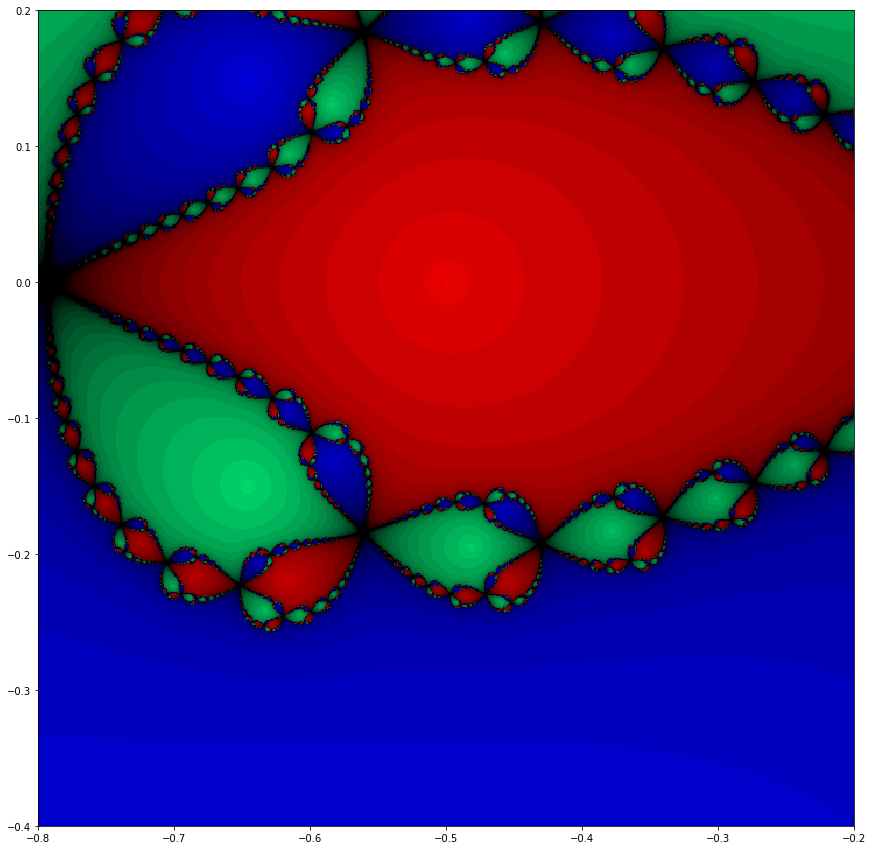

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


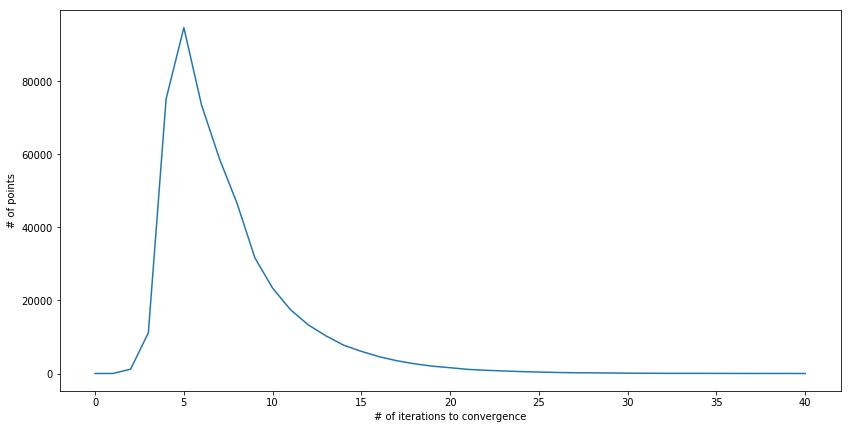

In [4]:
xmin = -0.8
xmax = -0.2
ymin = -0.4
ymax = 0.2
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[max(0, (sit-k)*f*c) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

**Question 3.** We pick the polynomial $z^4 - 1$, which has roots $\{1, -1, i, -i\}$. We then use the iteration map $$
   \phi(z) = z - \frac{z^4 - 1} {4z^3},
$$
which we define below as:

In [5]:
def phi(z):
    z = complex(z)
    return z - (z**4 - 1.) / (4. * z**3)

# Roots of z^4-1
zz = [complex(1., 0.), complex(-1., 0.), complex(0., 1.), complex(0., -1.)]

# Colors corresponding to each root
cc = [(1., 0., 0.), (0., 1., 1.), (0., 1., 0.), (1., 0., 1.)]

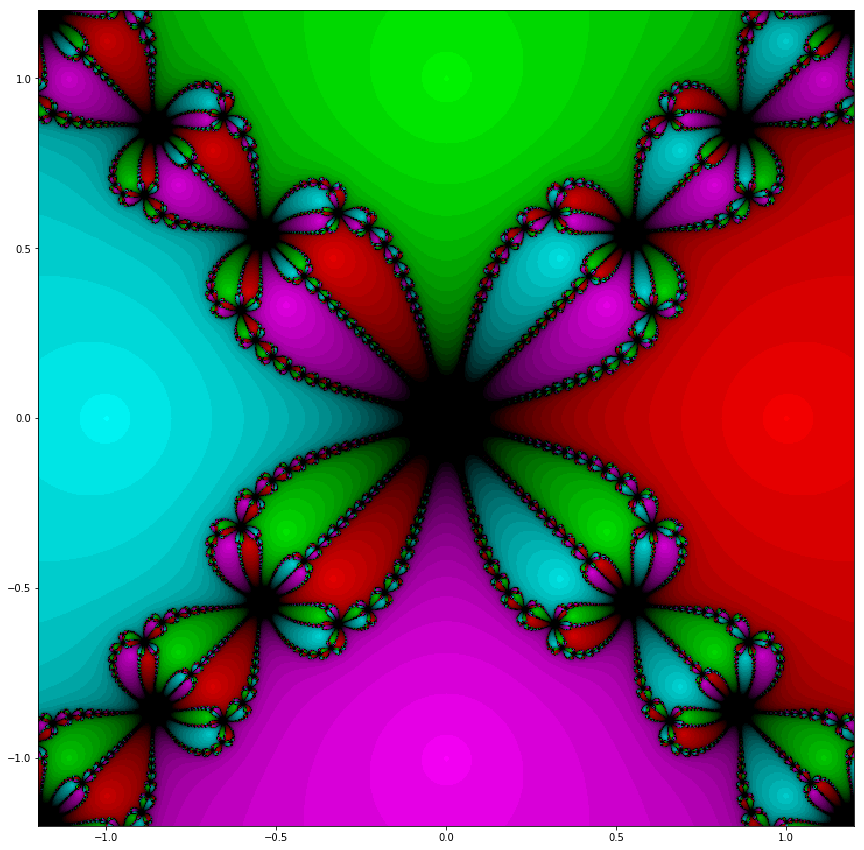

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


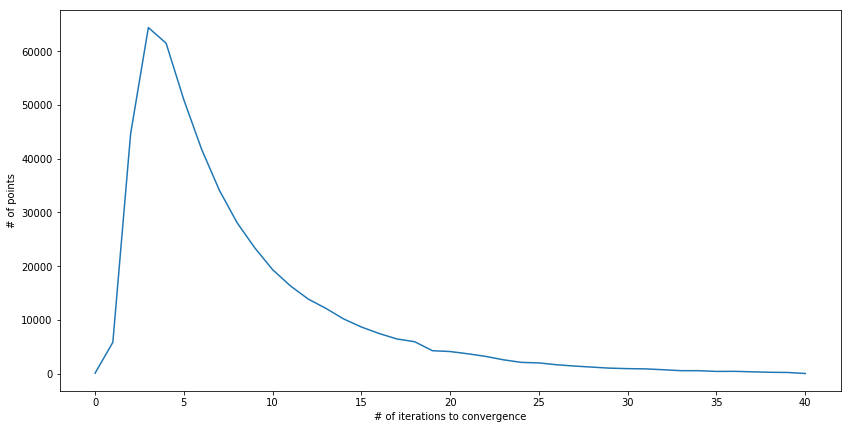

In [6]:
xmin = -1.2
xmax = 1.2
ymin = -1.2
ymax = 1.2
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                # modified 
                img[i,j]=[max(0, (sit-k)*f*c) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

**Question 4.** We first define a function (higher order function) to generate Steffensen's iteration as follows:

In [26]:
# Generate the Steffensen's iteration corresponding to f
# with parameter omega.
def steffensen(f, omega=1.0):
    phi = lambda z: z - (omega*f(z)*f(z))/(f(z+omega*f(z))-f(z))
    return phi

With this, we generate a graph for the polynomial $z^4 - 1$ for the values $\omega=1.0,1.5,2.0,2.5$:

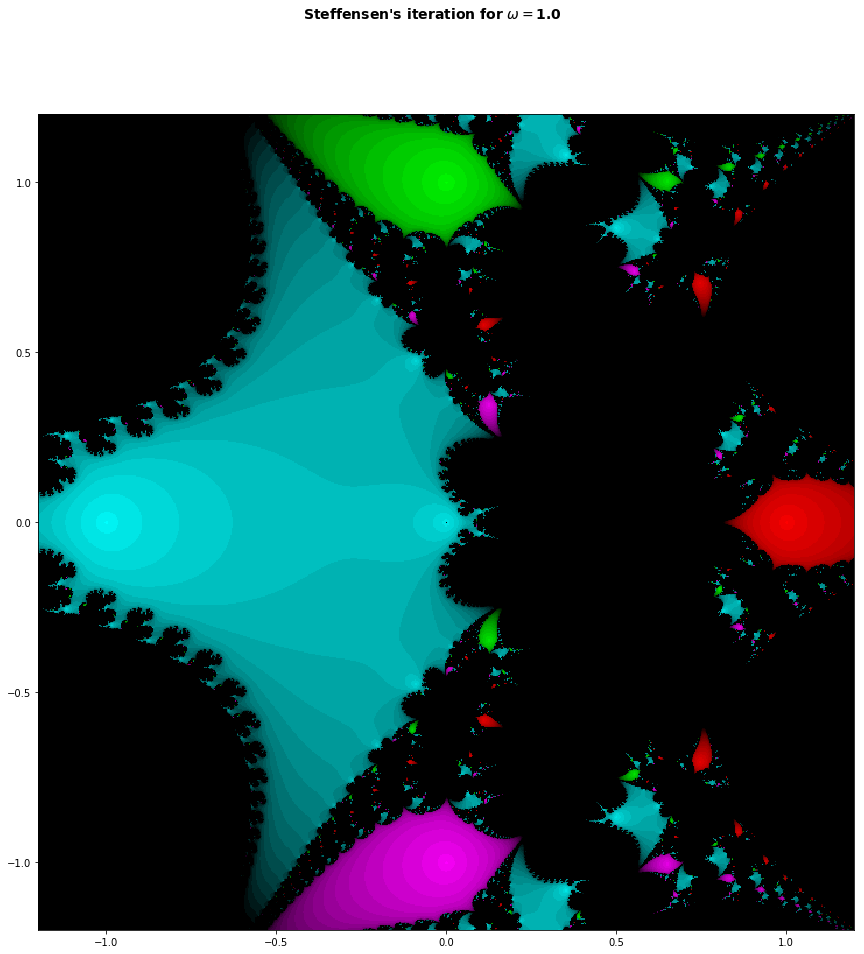

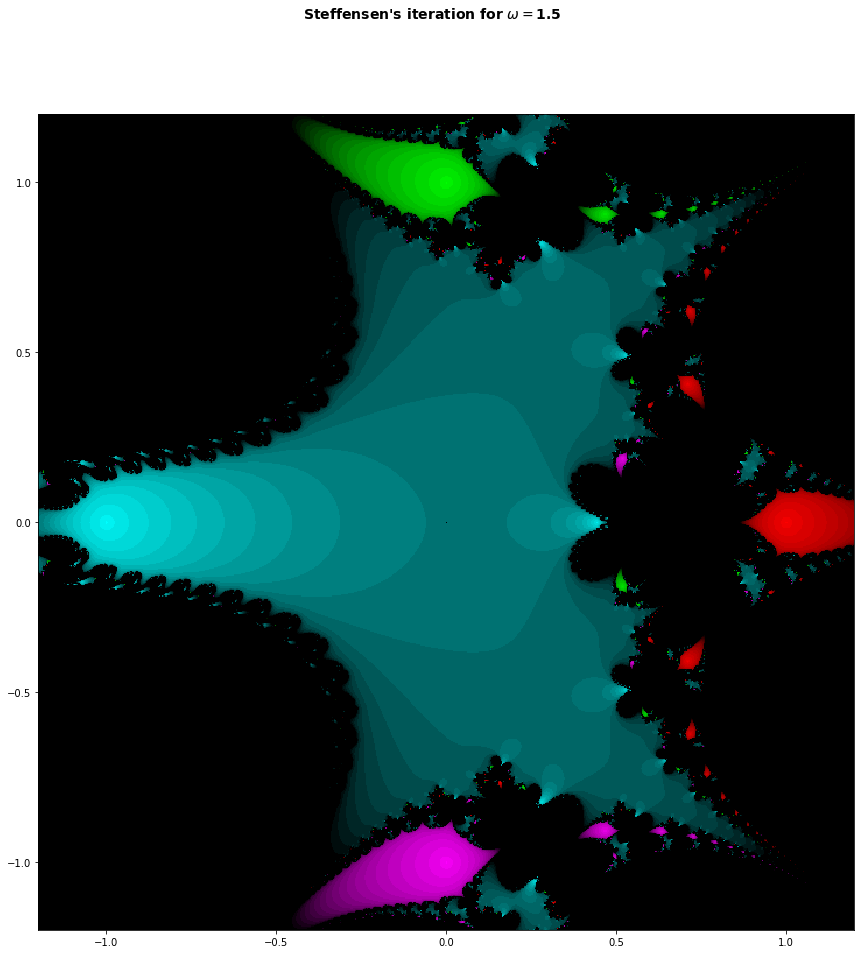

In [ ]:
# Parameters
xmin = -1.2
xmax = 1.2
ymin = -1.2
ymax = 1.2
eps = .0001
maxit = 40
imgx = 700
imgy = 700
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit

# Draw the image for different values of omega
omegas = [1.0, 1.5, 2.0, 2.5]
for omega in omegas:
    phi = steffensen(lambda z: z*z*z*z - 1, omega)
    img = np.zeros((imgy,imgx,3))
    for i in range(imgy):
        for j in range(imgx):
            x=xmin+a*j
            y=ymax-b*i
            z0=complex(x,y)
            for k in range(maxit):
                if abs(z0)<eps:
                    h[maxit]+=1
                    break
                z=phi(z0)
                con=False
                for l in range(len(zz)):
                    if abs(z-zz[l])<eps:
                        con=True
                        break
                if(con):
                    # modified 
                    img[i,j]=[max(0, (sit-k)*f*c) for c in cc[l]]
                    h[k]+=1
                    break
                z0=z
            if k==maxit: h[maxit]+=1
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(r"Steffensen's iteration for $\omega=$%.1f" % omega, fontsize=14, fontweight='bold')
    plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
    plt.show()
    #scipy.misc.imsave('newt.png', img)
    #plt.figure(figsize=(14,7))
    #plt.plot(range(maxit+1),h)
    #plt.xlabel('# of iterations to convergence')
    #plt.ylabel('# of points')
    #plt.show()